# Project 6: PsoC: Mixing analog, digital circuits, time series.
## Abstract
The purpose of this project was to introduce us to PSoC technology and give us an insight into concepts of digital logic and hardware, including comparators, gates and flip-flops. Due to the coronavirus, we took this project to an online version and applied the use of TinkerCad and KiCad to build circuits and schematics to understand how logic gates, flipflops, and comparators work. We built a a 4-bit up counter, a digital counter circuit, which provides a binary countdown from binary 0000 to 1111, 0 to 15 in decimal. We made sure this count was correct my connecting LED's, giving meaning to a 0 as the LED being turned off and a 1 as the LED being turned on.
## Description and Schematic
In digital logic and computing, a counter is a device which stores (and sometimes displays) the number of times a particular event or process has occurred, often in relationship to a clock. The most common type is a sequential digital logic circuit with an input line called the clock and multiple output lines. The values on the output lines represent a number in the binary or BCD number system. Each pulse applied to the clock input increments or decrements the number in the counter.

A counter circuit is usually constructed of a number of flip-flops connected in cascade. Counters are a very widely used component in digital circuits, and are manufactured as separate integrated circuits and also incorporated as parts of larger integrated circuits.
Below is an image of the circuit i built on TinkerCad and schematic from KiCad

![Tinkercad.png](Tinkercad.png)
![Kicad.png](Kicad.png)

In the above image, the basic Synchronous counter design is shown which is Synchronous up counter. A 4-bit Synchronous up counter start to count from 0 (0000 in binary) and increment or count upwards to 15 (1111 in binary) and then start new counting cycle by getting reset. There is no propagation delay in the synchronous counter just because all flip-flops or counter stage is in parallel clock source and the clock triggers all counters at the same time.

A comprator was used to supply voltage to the first flipflop. A comparator is a device that compares two voltages or currents and outputs a digital signal indicating which is larger. 

The external clock is directly provided to all J-K Flip-flops at the same time in a parallel way.  If we see the circuit, the first flip-flop, Flipflop 1B which is the least significant bit in this 4-bit synchronous counter, is connected to a comparator via J and K pin. 

Next stage, the second flip-flop 2A, input pin of J and K is connected across the output of the first Flip-flop. For the case of Flipflip 3B and Flipflop 4A, two separate AND gate provide the necessary logic across them. Those AND gates create logic using the input and output from the previous stage flip-flops.

LED's were connected to each flipflop to indicate the binary. If the LED is on it represents a binary code of 1, if it's off, it represents a binary code of 0.
The Csv file below shows how the truth logic table of this schematic of 4 bit sychronous up counter would look like

In [28]:
%matplotlib inline
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.optimize import curve_fit
db = pd.read_csv('Logic table.csv')
db

,State,4A,3B,2A,1B
0,0,0,0,0,0
1,1,0,0,0,1
2,2,0,0,1,0
3,3,0,0,1,1
4,4,0,1,0,0
...,...,...,...,...,...
11,11,1,0,1,1
12,12,1,1,0,0
13,13,1,1,0,1
14,14,1,1,1,0


## Conclusion
This project was all about understanding how logic gates, flipflops, and comparators work. We tried to build a 4 bit synchronous circuit. We did this using four flipflops and two And gates. I have always thought about And gates as a multiplier kind of gate as you can have a High outpit if and only if both inputs are High. A 4 bit couter should have count from 0 to 16 where all flipflops produce 1, then it restarts. We used an LED to figure out the counts. 

# Statistics Exercise
## Time Series

I found a Minimum Daily Temperatures Dataset. This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

In [74]:
pd.set_option('display.max_rows',15) # this limit maximum numbers of rows

In [75]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
dft=pd.read_csv(url)
dft.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [76]:
import datetime
dft.Date = pd.to_datetime(dft.Date)

Text(0, 0.5, 'Temp')

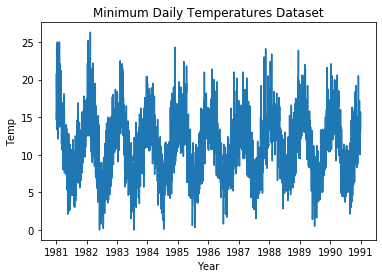

In [77]:
pl.plot(dft.Date, dft.Temp)
pl.title('Minimum Daily Temperatures Dataset')
pl.xlabel('Year')
pl.ylabel('Temp')

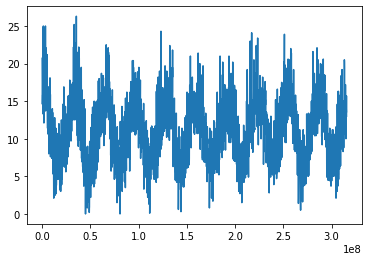

In [78]:
tsecs = (dft.Date.values.astype('datetime64') - dft.Date.values[0].astype('datetime64'))/np.timedelta64(1,'s')
tsecs
pl.plot(tsecs, dft.Temp)

A = 4.2148+/-0.0651 degrees, omega = 0.0000 +/- 0.0000 rad/sec
Offset = 11.1849+/-0.0461 degrees


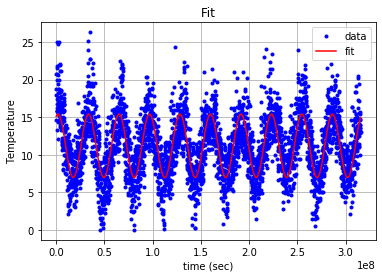

In [135]:
A0 = 8
T = 0.35e8
def model(t, A, omega, phi, off):
    return A*np.sin(omega*t + phi) + off

par, cov = curve_fit(model, tsecs, dft.Temp, p0 = (A0, (2*np.pi)/T, 11, 0))

A, omega, phi, off = par
dA, dOm, dPhi, dOff = np.sqrt(np.diag(cov))

print("A = {0:3.4f}+/-{1:3.4f} degrees, omega = {2:3.4f} +/- {3:3.4f} rad/sec".format(A, dA, omega, dOm))
print("Offset = {0:3.4f}+/-{1:3.4f} degrees". format(off, dOff))
pl.plot(tsecs, dft.Temp ,'b.', label='data')
pl.plot(tsecs, model(tsecs, *par), 'r-', label="fit")
pl.grid()
pl.title("Fit")
pl.xlabel('time (sec)')
pl.ylabel('Temperature')
pl.legend()

In [25]:
dft.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [133]:
freq = (2*np.pi)/T
print("%3.4e" %freq)

1.7952e-07


I fitted the minimum temperature dataset to a sine curve. From this fit i found the frequency that a particular set of temp occur to be 1.7952e-07. i found out that temperatures higher than 15 just proved to be statistical noise. I would say low probability they could happen over time.